# Galaxia: Generating synthetic surveys

### Parameters/outputs: 

They are contained in the file $\texttt{test1parameters}$, which is located in the /u/casey_lam/scratch directory on sloop. In particular, we try to get all stars (so magnitude limits are -1000 to 1000), we want a full sky survey (so geometryOption is set to 0), and fSample is 10${}^{-6}$ such that the computer doesn't become stupid slow.

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

### Coordinate system (Heliocentric to Galactocentric)

The first step is figuring out the coordinate system used. /px, /py, and /pz are the x, y, z heliocentric positions given in kpc. The first step is to figure out what the orientation of the axes are.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord
#from astropy.coordinates import CartesianDifferential

#from astropy.coordinates import SkyCoord
#from astropy.coordinates import ICRS, Galactic, FK4, FK5
#from astropy.coordinates import Angle, Latitude, Longitude
#import astropy.units as u

#from __future__ import print_function
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
#import astropy.coordinates as coord
#import astropy.units as u

In [2]:
#load px, py, pz (cartesian coordinates) from galaxia
HCx = np.loadtxt("test1_px") #kpc, heliocentric
HCy = np.loadtxt("test1_py") #kpc, heliocentric
HCz = np.loadtxt("test1_pz") #kpc, heliocentric

Below are plots of the MW star distribution in HELIOCENTRIC coordinates!

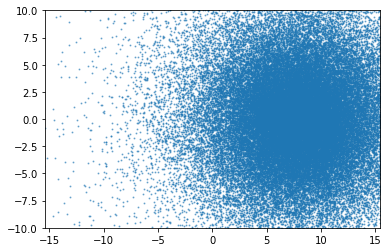

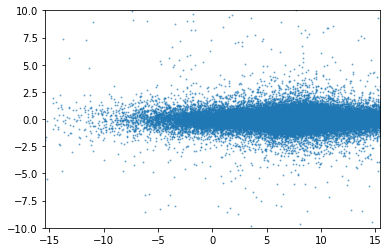

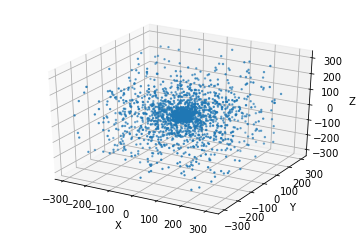

In [3]:
#slice of the x-y plane
plt.plot(HCx,HCy,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#slice of the x-z plane
plt.plot(HCx,HCz,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#full 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(HCx, HCy, HCz, s = 2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Let's convert to Galactocentric coordinates. /center gives the position and velocity of sun in galactocentric coordinates, where the first 3 coordinates are position in kpc and the last three velocity in km/s.

In [4]:
sun = np.loadtxt("test1_center") #first three positions in kpc, second three velocities in km/s heliocentric
print(sun)
#So to go between heliocentric and galactocentric coordinates, just add this to convert?

[ -8.00000000e+00   0.00000000e+00   1.50000000e-02   1.11000000e+01
   2.39080000e+02   7.25000000e+00]


In [8]:
#transform from heliocentric to galactocentric positions
GCx = HCx + sun[0]
GCy = HCy + sun[1]
GCz = HCz + sun[2]

#transform from heliocentric to galactocentric velocities
#v_sun = coord.CartesianDifferential([sun[3], sun[4], sun[5]]*u.km/u.s)
#gc_frame = coord.Galactocentric(galcen_distance=sun[0]*u.kpc, galcen_v_sun=v_sun, z_sun=sun[2]*u.kpc)

Now, plots of the MW star distribution in GALACTOCENTRIC coordinates!

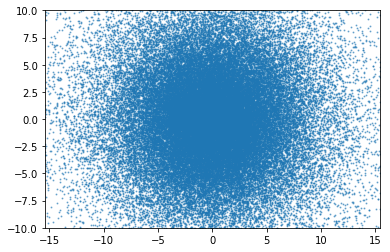

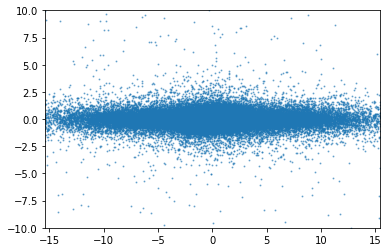

In [9]:
#slice of the x-y plane
plt.plot(GCx,GCy,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

#slice of the x-z plane
plt.plot(GCx,GCz,'.', alpha=0.5, ms=2)
plt.axis('equal')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Below are some histograms concerning the number of stars as a function of distance from the Galactic Center.

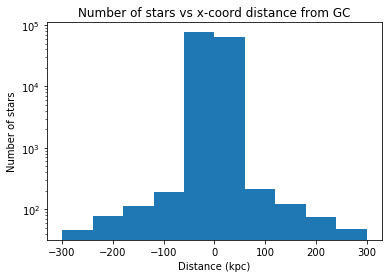

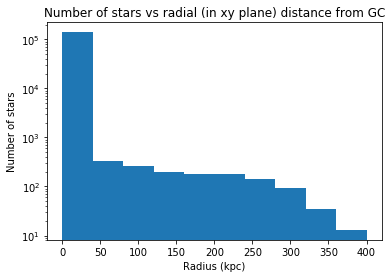

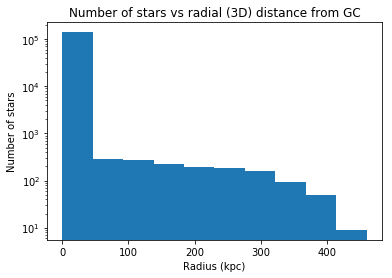

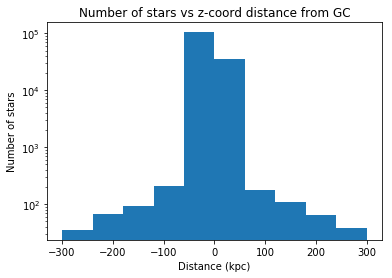

In [14]:
#along x-axis
plt.hist(GCx)
plt.xlabel("Distance (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs x-coord distance from GC")
plt.show()

#radius in xy-plane
radiusGCxy = []
for i in np.arange(len(GCx)):
    radiusGCxy.append(np.sqrt(GCx[i]**2 + GCy[i]**2))
    
plt.hist(radiusGCxy)
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs radial (in xy plane) distance from GC")
plt.show()

#radius in 3D
radiusGC = []
for i in np.arange(len(GCx)):
    radiusGC.append(np.sqrt(GCx[i]**2 + GCy[i]**2 + GCz[i]**2))
plt.hist(radiusGC)
plt.xlabel("Radius (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs radial (3D) distance from GC")
plt.show()

plt.hist(GCz)
plt.xlabel("Distance (kpc)")
plt.ylabel("Number of stars")
plt.yscale('log')
plt.title("Number of stars vs z-coord distance from GC")
plt.show()

In [ ]:
c0 = coord.Galactocentric(x = GCx*u.kpc, y = GCy*u.kpc, z = GCz*u.kpc, z_sun=sun[2]*u.kpc, galcen_distance=sun[0]*u.kpc)
c1 = c0.transform_to(coord.ICRS)
dist = c1.distance
print(dist)
plt.hist(dist)
plt.xlabel("")
#plt.xscale('log')
plt.ylabel("")
plt.yscale('log')
plt.title("")
plt.show()

np.loadtxt("test1_rad") #kpc, heliocentric